<a href="https://colab.research.google.com/github/jiayeye28/BDML-Life-Insurance/blob/main/BDML_Model_(ORIGINAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification


In [ ]:
!pip install scikit-plot
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap
import shap

from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 32.7 MB/s eta 0:00:00


#**Importing Data**

In [ ]:
# Load the cleaned CSV data file into a Pandas dataframe.
LINK = 'https://raw.githubusercontent.com/mwang164/Prudential-Life-Insurance-Assessment/main/Cleaned_Prudential_V1.csv'
df = pd.read_csv(LINK)

In [ ]:
# Set 'id' as the index column
df.set_index('Id', inplace=True)

print(df.shape)

df.head()

(59351, 137)


,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_4,...,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,-1.922281,0.641791,0.581818,0.163180,0.323008,-2.679429,-6.702620e+10,0.3600,-806554.282541,0.440000,...,0,0,0,0,0,0,1,0,0,8
5,-1.922281,0.089552,0.600000,0.163180,0.302855,-3.492644,-6.702620e+10,0.0018,-953121.904684,0.225352,...,0,0,0,0,0,0,0,0,0,4
6,-1.922281,0.089552,0.745455,0.288703,0.428780,-2.645368,-6.702620e+10,0.0300,-549693.333254,0.225352,...,0,0,0,0,0,0,0,0,1,8
7,-0.651127,0.164179,0.672727,0.205021,0.352438,-2.467657,-6.702620e+10,0.2000,-549693.333254,0.352113,...,0,0,0,0,0,0,0,1,0,8
8,-1.235182,0.417910,0.654545,0.234310,0.424046,-2.697051,-6.702620e+10,0.0500,-549693.333254,0.408451,...,0,0,0,0,0,1,0,0,0,8


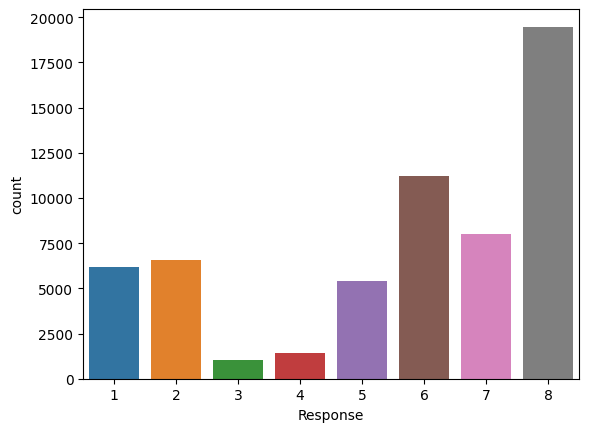

In [ ]:
sns.countplot(x=df['Response']);

## **Feature Importance**




In [ ]:
# sample_df = df.sample(10000,random_state=12345)  # Randomly sample 10,000 of the reviews
X = df.drop(['Response'],axis=1)
y = df['Response']

In [ ]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X,y)

RandomForestRegressor(n_estimators=1000)

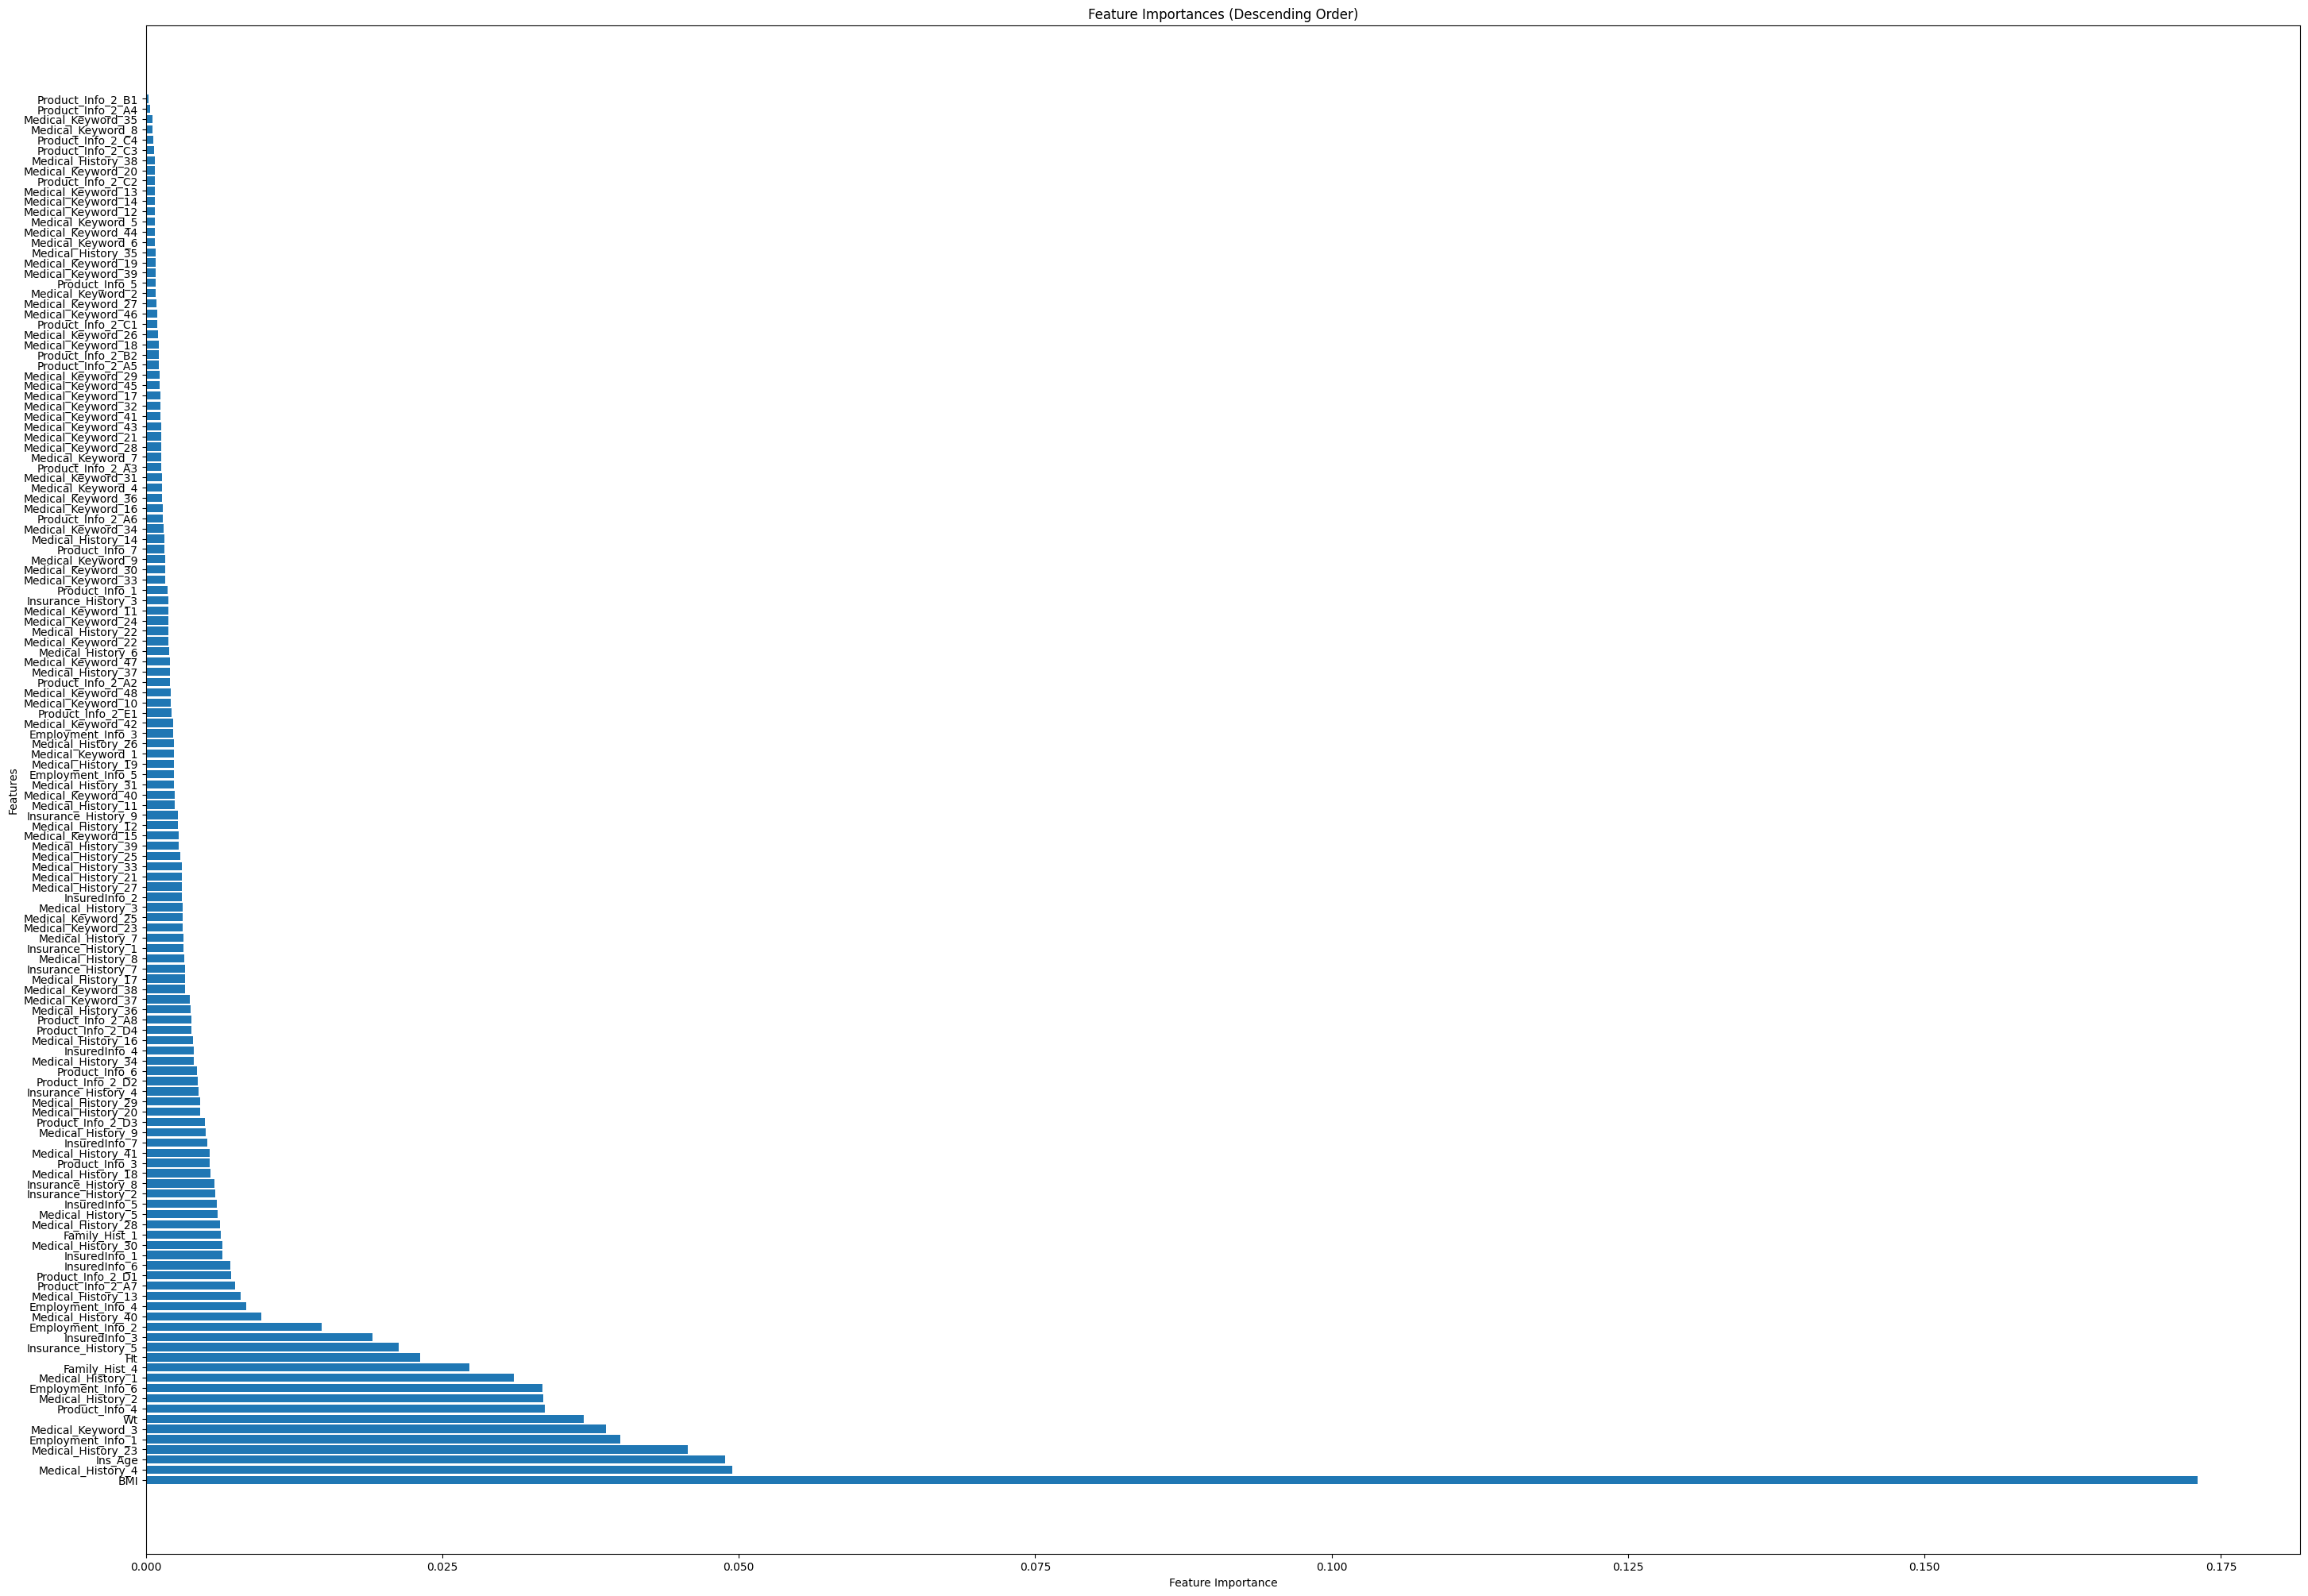

In [ ]:
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

plt.figure(figsize=(35,25))
plt.barh(X.columns[indices], feature_importances[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances (Descending Order)")
plt.show()


In [ ]:
X.columns[indices][:35]

Index(['BMI', 'Medical_History_4', 'Ins_Age', 'Medical_History_23',
       'Employment_Info_1', 'Medical_Keyword_3', 'Wt', 'Product_Info_4',
       'Medical_History_2', 'Employment_Info_6', 'Medical_History_1',
       'Family_Hist_4', 'Ht', 'Insurance_History_5', 'InsuredInfo_3',
       'Employment_Info_2', 'Medical_History_40', 'Employment_Info_4',
       'Medical_History_13', 'Product_Info_2_A7', 'Product_Info_2_D1',
       'InsuredInfo_6', 'InsuredInfo_1', 'Medical_History_30', 'Family_Hist_1',
       'Medical_History_28', 'Medical_History_5', 'InsuredInfo_5',
       'Insurance_History_2', 'Insurance_History_8', 'Medical_History_18',
       'Product_Info_3', 'Medical_History_41', 'InsuredInfo_7',
       'Medical_History_9'],
      dtype='object')

In [ ]:
# important features
imp_feature = ['BMI', 'Medical_History_4', 'Ins_Age', 'Medical_History_23',
       'Employment_Info_1', 'Medical_Keyword_3', 'Wt', 'Product_Info_4',
       'Medical_History_2', 'Employment_Info_6', 'Medical_History_1',
       'Family_Hist_4', 'Ht', 'Insurance_History_5', 'InsuredInfo_3',
       'Employment_Info_2', 'Medical_History_40', 'Employment_Info_4',
       'Medical_History_13', 'Product_Info_2_A7', 'Product_Info_2_D1',
       'InsuredInfo_6', 'InsuredInfo_1', 'Medical_History_30', 'Family_Hist_1',
       'Medical_History_28', 'Medical_History_5', 'InsuredInfo_5',
       'Insurance_History_2', 'Insurance_History_8', 'Medical_History_18',
       'Product_Info_3', 'Medical_History_41', 'InsuredInfo_7',
       'Medical_History_9']
X_imp = df[imp_feature]
y = df['Response']

## **Holdout Sampling**

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X_imp, y,
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0,
                     stratify=y)
print('Shape of X and y',X_imp.shape, y.shape,
      '\nShape of training set X and y',X_train.shape, y_train.shape,
      '\nShape of test set X and y',X_test.shape, y_test.shape)


Shape of X and y (59351, 35) (59351,) 
Shape of training set X and y (47480, 35) (47480,) 
Shape of test set X and y (11871, 35) (11871,)


#**Horse Race**

In [ ]:
# Horse Race
# removing "SVM(poly)","SVM(rbf)" due to poor fit
names = ["Decision Tree", "MLP", "Random Forest", "XGBoost", "Light GBM(multi)", "Light GBM(ova)", "AdaBoost"]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50, # softmax
               learning_rate=0.1, reg_lambda=0.2),
    LGBMClassifier(boosting_type='gbdt', objective='multiclassova', num_leaves=50, # one vs all
               learning_rate=0.1, reg_lambda=0.2),
    AdaBoostClassifier(random_state=0)]

for name, clf in zip(names, classifiers):
  # Pipeline
  estimators = []
  estimators.append(('MinMax', MinMaxScaler()))
  estimators.append(('classifier',clf))
  model = Pipeline(estimators)
  # Encode class labels
  le = LabelEncoder()
  y_encoded = le.fit_transform(y)
  # Eval Pipeline
  kfold_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)
  scoring = ['accuracy']
  for sc in scoring:
    results = cross_val_score(model, X=X_imp, y=y_encoded, cv=kfold_cv, scoring=sc)
    print('Classifier: %s Metric %s mean (std deviation): %.3f (%.3f)' % (name, sc, results.mean(), results.std()))

 # Random Forest achieved a higher accuracy in Pycarat? what happens here?

Classifier: Decision Tree Metric accuracy mean (std deviation): 0.491 (0.002)
Classifier: MLP Metric accuracy mean (std deviation): 0.495 (0.002)
Classifier: Random Forest Metric accuracy mean (std deviation): 0.404 (0.001)
Classifier: XGBoost Metric accuracy mean (std deviation): 0.518 (0.002)
Classifier: Light GBM(multi) Metric accuracy mean (std deviation): 0.520 (0.002)
Classifier: Light GBM(ova) Metric accuracy mean (std deviation): 0.524 (0.001)
Classifier: AdaBoost Metric accuracy mean (std deviation): 0.482 (0.001)


## **Leaderboard**
|**Classifier** |    Accuracy    |
|:----------------------|:------------:|
|Light GBM(ova)|0.524 |
|Light GBM(multi)| 0.520 |
|XGBoost| 0.518 |
|MLP|0.491 |
|Decision Tree|0.491 |
|AdaBoost| 0.482 |
|Random forest|0.404|


#**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm)

print("Checking: mean of column 0 of X_train:",X_train_norm[0].mean(), " and its std deviation:", X_train_norm[0].std())

[[0.31373857 0.         0.69047619 ... 0.         0.         0.5       ]
 [0.49009712 0.         0.64285714 ... 0.         0.         0.5       ]
 [0.80517642 0.         0.45238095 ... 1.         0.         0.        ]
 ...
 [0.50461804 1.         0.5        ... 0.         0.         0.5       ]
 [0.22256485 1.         0.45238095 ... 0.         0.         0.5       ]
 [0.21614756 1.         1.         ... 0.         0.         0.5       ]]
Checking: mean of column 0 of X_train: 0.3488361644538268  and its std deviation: 0.39070213722957786


# **Classifiers**

## **Gridsearch Classifier**

In [ ]:
# Label-encode each dataset for compatibility with the XGBoost classifier (model 12) - "use_label_encoder" has since become deprecated.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert each set of class labels (1,2,5,6,7,8) into encoded labels (0-5).
y_en = le.fit_transform(y)
y_train=le.fit_transform(y_train)
y_test = le.transform(y_test)

## **XGBoost**

In [ ]:
param_grid = {
    'max_depth': [5,7,9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [5, 10, 15],
    'n_estimators': [100, 200, 300],
}

clf = XGBClassifier(objective='multi:softprob',
                    num_class= 8 ,
                    booster='gbtree',
                    eval_metric='mlogloss',
                    tree_method='gpu_hist', gpu_id=0, # Boosting with Colab GPU support
                    grow_policy='lossguide',
                    use_label_encoder=False)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding balaced_accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.4f}".format(grid_search.best_score_))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best hyperparameters:  {'gamma': 5, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best accuracy: 0.5240


Best hyperparameters:  {'gamma': 5, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best accuracy: 0.5240

## **Lightgbm**

In [ ]:
# One v All
# Define the hyperparameter grid to search over
param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01,0.05],
    'n_estimators': [100, 200, 500],
    'colsample_bytree': [0.5, 0.7]
      }

# Define the LightGBM classifier with the fixed hyperparameters
lgbm_clf = LGBMClassifier(boosting_type='gbdt',objective='multiclassova', num_classes=8, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding mean test score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean test score: ", grid_search.best_score_)


Best hyperparameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 63}
Best mean test score:  0.5248525695029486


In [ ]:
# Softmax
# Define the hyperparameter grid to search over
param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01,0.05],
    'n_estimators': [100, 200, 500],
    'colsample_bytree': [0.5, 0.7]
      }

# Define the LightGBM classifier with the fixed hyperparameters
lgbm_clf = LGBMClassifier(boosting_type='gbdt',objective='multiclass', num_classes=8, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding mean test score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean test score: ", grid_search.best_score_)

Best hyperparameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}
Best mean test score:  0.525084245998315


## **Multilayer Perceptron**

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(10,10), (20,20)],
    'alpha': [0.01, 0.1, 1.0],
    'max_iter': [200, 500]
      }

# Define the LightGBM classifier with the fixed hyperparameters
mlp_clf = MLPClassifier(activation = 'relu', solver= 'adam')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding mean test score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean test score: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.01, 'hidden_layer_sizes': (20, 20), 'max_iter': 500}
Best mean test score:  0.5152906486941871


## **Random Forest**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

rf_clf = RandomForestClassifier(random_state=12, n_jobs=-1)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding balaced_accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.4f}".format(grid_search.best_score_))

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy: 0.5094


## **One Vs One Classifier**

In [ ]:
param_grid = {
            'estimator__num_leaves': [31, 63, 127],
            'estimator__learning_rate': [0.01,0.05],
            'estimator__n_estimators': [100, 200, 500],
            'estimator__colsample_bytree': [0.5, 0.7]
}


ovo_clf = OneVsOneClassifier(LGBMClassifier(boosting_type='gbdt',objective='binary'))

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(ovo_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding balaced_accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.4f}".format(grid_search.best_score_))

Best hyperparameters:  {'estimator__colsample_bytree': 0.7, 'estimator__learning_rate': 0.01, 'estimator__n_estimators': 500, 'estimator__num_leaves': 31}
Best accuracy: 0.5261



## **Stack Model**

### **LGB**

#### **LGB - softmax**

In [ ]:
## Test of lgb_model as level 1

from sklearn.ensemble import StackingClassifier


# Define the level-0 models
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam', hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)

# Define the level-1 model
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=8,
                           learning_rate=0.01, n_estimators=500, num_leaves=31,colsample_bytree= 0.7)

# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('XGB', xgb_model), ('RF', rf_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=lgb_model)

# Define the hyperparameters to search over
param_grid = {
              'final_estimator__min_child_samples': [10,20],
              'final_estimator__reg_alpha': [ 0.1,0.05],
              'final_estimator__reg_lambda': [0.1,1]
              }

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))

# 1hr

Best: 0.525421 using {'final_estimator__min_child_samples': 20, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 1}


#### **LGB - ova**

In [ ]:
## Test of lgb_model_ova as level 1

from sklearn.ensemble import StackingClassifier


# Define the level-0 models
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam', hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)

# Define the level-1 model
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclassova', num_class=8,
                           learning_rate=0.01, n_estimators=500, num_leaves=31,colsample_bytree= 0.7)

# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('XGB', xgb_model), ('RF', rf_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=lgb_model)

# Define the hyperparameters to search over
param_grid = {
              'final_estimator__min_child_samples': [10,20],
              'final_estimator__reg_alpha': [ 0.1,0.05],
              'final_estimator__reg_lambda': [0.1,1]
              }

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))

# 1hr

Best: 0.526095 using {'final_estimator__min_child_samples': 10, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 1}


#### **LGB - ovo**

In [ ]:
## Test of lgb_model_ovo as level 1
# 'estimator__colsample_bytree': 0.7, 'estimator__learning_rate': 0.01, 'estimator__n_estimators': 500, 'estimator__num_leaves': 31

from sklearn.ensemble import StackingClassifier


# Define the level-0 models
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam', hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)
lgb_model = LGBMClassifier(boosting_type='gbdt',objective='binary',
                                           learning_rate=0.01, n_estimators=500,
                                            num_leaves=31,colsample_bytree= 0.7)

# Define the level-1 model
ovo_clf = OneVsOneClassifier(estimator = lgb_model)

# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('XGB', xgb_model), ('RF', rf_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=ovo_clf)

# Define the hyperparameters to search over
param_grid = {
              'final_estimator__estimator__min_child_samples': [10,20],
              'final_estimator__estimator__reg_alpha': [ 0.1,0.05],
              'final_estimator__estimator__reg_lambda': [0.1,1]
              }

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))


Best: 0.524137 using {'final_estimator__estimator__min_child_samples': 10, 'final_estimator__estimator__reg_alpha': 0.1, 'final_estimator__estimator__reg_lambda': 1}


### **XGB**

In [ ]:
## Test of xgb_model as level 1

from sklearn.ensemble import StackingClassifier


# Define the level-0 models
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam', hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=8,
                           learning_rate=0.01, n_estimators=500, num_leaves=31,colsample_bytree= 0.7)
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)

# Define the level-1 model
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)


# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('LGB', lgb_model), ('RF', rf_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=xgb_model)

# Define the hyperparameters to search over
param_grid = {
              'final_estimator__reg_alpha': [ 0.01,0.05],
              'final_estimator__reg_lambda': [0.1,1,7],
              'final_estimator__min_child_weight': [1,5,10]
              }

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))

# 13min

Best: 0.525590 using {'final_estimator__min_child_weight': 1, 'final_estimator__reg_alpha': 0.01, 'final_estimator__reg_lambda': 7}


### **RF**

In [ ]:
## Test of rf_model as level 1

from sklearn.ensemble import StackingClassifier


# Define the level-0 models
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam', hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=8,
                           learning_rate=0.01, n_estimators=500, num_leaves=31,colsample_bytree= 0.7)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)

# Define the level-1 model
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)



# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('LGB', lgb_model), ('xgb', xgb_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=rf_model)

# Define the hyperparameters to search over
param_grid = {
              'final_estimator__max_depth': [5, 10, 15],
              'final_estimator__min_samples_leaf': [1, 2, 5]
              }

# Perform grid search using cross-validation
gsearch_final = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch_final.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch_final.best_score_, gsearch_final.best_params_))



Best: 0.524621 using {'final_estimator__max_depth': 10, 'final_estimator__min_samples_leaf': 2}


### **MLP**

In [ ]:
## Test of mlp_model as level 1

from sklearn.ensemble import StackingClassifier


# Define the level-0 models
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=8,
                           learning_rate=0.01, n_estimators=500, num_leaves=31,colsample_bytree= 0.7)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)

# Define the level-1 model
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam', hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)


# Define the stacking ensemble
level0 = [('XGB', xgb_model), ('LGB', lgb_model), ('rf', rf_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=mlp_model)

# Define the hyperparameters to search over
param_grid = {'final_estimator__hidden_layer_sizes': [(10,), (20,), (30,)],
                'final_estimator__alpha': [0.005, 0.01, 0.1],
                'final_estimator__max_iter': [500, 1000]
              }

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))



Best: 0.524452 using {'final_estimator__alpha': 0.005, 'final_estimator__hidden_layer_sizes': (20,), 'final_estimator__max_iter': 1000}


## **Final Leaderboard**
|**Classifier** |    Accuracy    |
|:----------------------|:------------:|
|OVO LGB Classifier| 0.5261|
|LGB Stacked (ova)|0.5261 |
|XGB Stacked| 0.5256 |
|Light GBM (multiclass)| 0.5250 |
|Light GBM (ova)|  0.5249 |
|RF Stacked| 0.5246 |
|MLP Stacked| 0.5245 |
|XGBoost| 0.5240 |
|MLP|0.5153 |
|Random forest|0.5094|





## **Model Fit**

In [ ]:
# Define All Models
# MLP
mlp_model = MLPClassifier(activation = 'relu', solver= 'adam',
                          hidden_layer_sizes=(20,20),alpha=0.01, max_iter=500)
# OVO LGB
ovo_model = OneVsOneClassifier(LGBMClassifier(boosting_type='gbdt',objective='binary',learning_rate=0.01,
                                              n_estimators=500, num_leaves=31,colsample_bytree= 0.7))

# RF
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                  n_estimators= 200, random_state=12, n_jobs=-1)

# lGBM (multiclass)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=8,
                           learning_rate=0.01, n_estimators=500, num_leaves=31,colsample_bytree= 0.7)

# XGB
xgb_model = XGBClassifier(objective='multi:softprob', num_class=8, gamma= 5, booster='gbtree',
                          learning_rate=0.05, max_depth=7,n_estimators=200)

# Define the Satcked model
lgb_model_stacked = LGBMClassifier(boosting_type='gbdt', objective='multiclassova', num_class=8,
                                   learning_rate=0.01, n_estimators=500, num_leaves=31, colsample_bytree= 0.7,
                                   min_child_samples=10, reg_alpha=0.1, reg_lambda=1 )

# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('XGB', xgb_model), ('RF', rf_model)]

stacked_model = StackingClassifier(estimators=level0, final_estimator=lgb_model_stacked)

In [ ]:
# xgb model fit
xgb_model.fit(X_train_norm,y_train)
# OVO LGB model fit
ovo_model.fit(X_train_norm,y_train)
# lgbm model fit
lgb_model.fit(X_train_norm,y_train)
# rf model fit
rf_model.fit(X_train_norm,y_train)
# mlp model fit
mlp_model.fit(X_train_norm,y_train)
# Train the stacked model on the full training set with the best hyperparameters
stacked_model.fit(X_train_norm, y_train)

StackingClassifier(estimators=[('MLP',
                                MLPClassifier(alpha=0.01,
                                              hidden_layer_sizes=(20, 20),
                                              max_iter=500)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=5,
                                              gpu_id=None, g...
                                              n_estimators=200, n_jobs=None,
                                              num_class=8,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('RF',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=12))],
                   final_estimator=LGBMClassifier(colsample_bytree=0.7,
                                                  learning_rate=0.01,
                                                  min_child_samples=10,
                                                  n_estimators=500, num_class=8,
                                                  objective='multiclassova',
                                                  reg_alpha=0.1, reg_lambda=1))

## **Prediction**

In [ ]:
# predict probability
xgb_model_PredProb = xgb_model.predict_proba(X_test_norm)

lgb_model_PredProb = lgb_model.predict_proba(X_test_norm)
rf_model_PredProb = rf_model.predict_proba(X_test_norm)
mlp_model_PredProb = mlp_model.predict_proba(X_test_norm)
stacked_model_PredProb = stacked_model.predict_proba(X_test_norm)

# converting probabilities into label predictions
xgb_model_PredClass = np.argmax(xgb_model_PredProb, axis=1)
xgb_model_PredClass = le.inverse_transform(xgb_model_PredClass)

ovo_model_PredClass = ovo_model.predict(X_test_norm)
ovo_model_PredClass = le.inverse_transform(ovo_model_PredClass)

lgb_model_PredClass = np.argmax(lgb_model_PredProb, axis=1)
lgb_model_PredClass = le.inverse_transform(lgb_model_PredClass)

rf_model_PredClass = np.argmax(rf_model_PredProb, axis=1)
rf_model_PredClass = le.inverse_transform(rf_model_PredClass)

mlp_model_PredClass = np.argmax(mlp_model_PredProb, axis=1)
mlp_model_PredClass = le.inverse_transform(mlp_model_PredClass)

stacked_model_PredClass = np.argmax(stacked_model_PredProb, axis=1)
stacked_model_PredClass = le.inverse_transform(stacked_model_PredClass)




## **Evaluation**

In [ ]:
# Inverse transfer y
y_test = le.inverse_transform(y_test)

Text(0.5, 1.0, 'XGB ROC Curve')

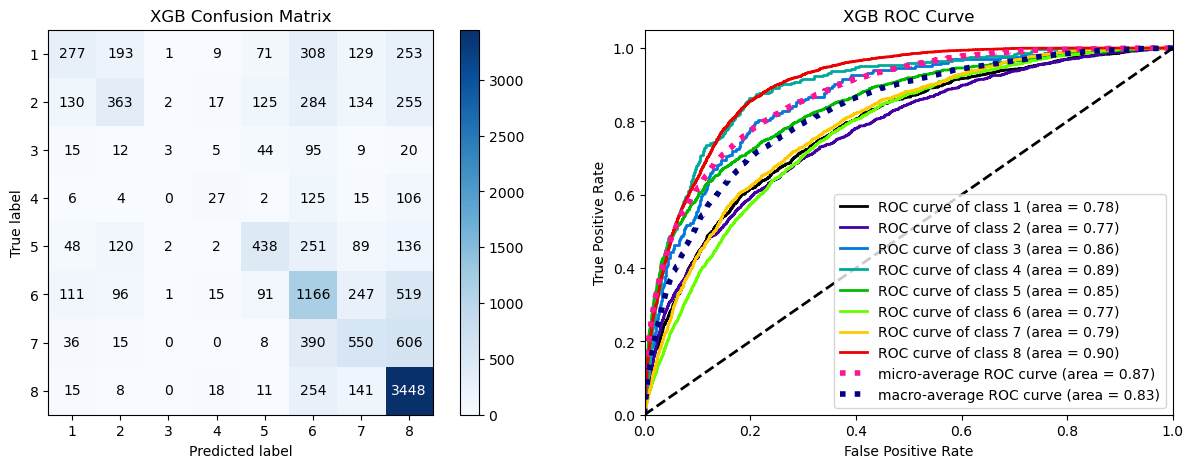

In [ ]:
# evaluate XGB model
xgb_cm = confusion_matrix(y_test, xgb_model_PredClass)
xgb_acc = balanced_accuracy_score(y_test, xgb_model_PredClass)
xgb_roc_auc = roc_auc_score(y_test, xgb_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, xgb_model_PredClass, ax=ax1)
ax1.set_title('XGB Confusion Matrix')
plot_roc(y_test, xgb_model_PredProb, ax=ax2)

ax2.set_title('XGB ROC Curve')


Text(0.5, 1.0, 'OVO Confusion Matrix')

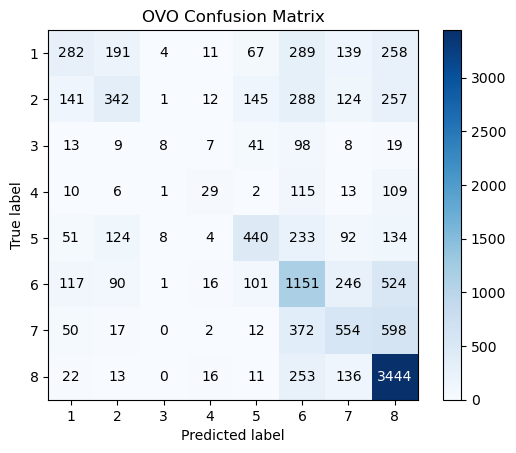

In [ ]:
# evaluate OVO model
ovo_acc = balanced_accuracy_score(y_test, ovo_model_PredClass)
plot_confusion_matrix(y_test, ovo_model_PredClass)
plt.title('OVO Confusion Matrix')

# Does not Provide a Pred_Probability

Text(0.5, 1.0, 'LGB ROC Curve')

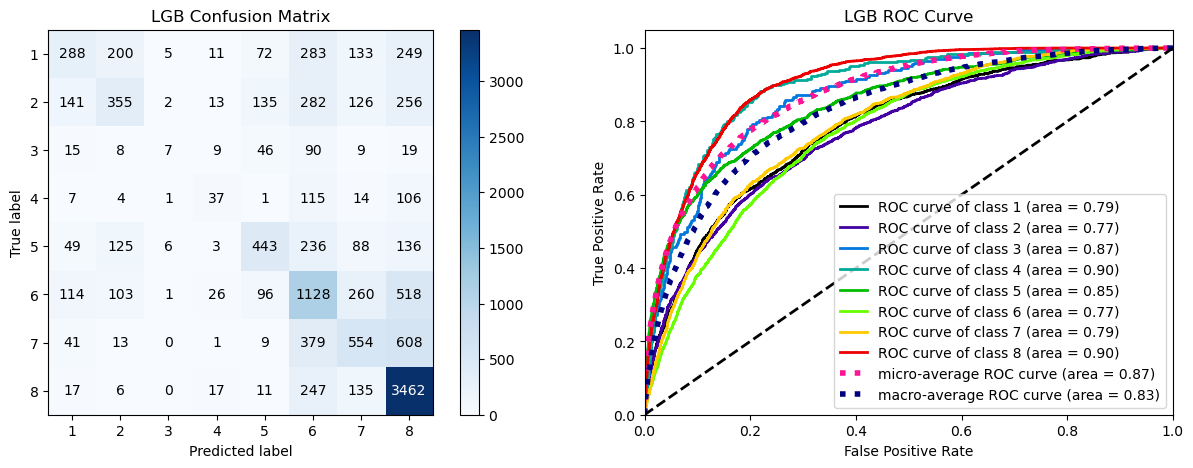

In [ ]:
# evaluate LGB model
lgb_cm = confusion_matrix(y_test, lgb_model_PredClass)
lgb_acc = balanced_accuracy_score(y_test, lgb_model_PredClass)
lgb_roc_auc = roc_auc_score(y_test, lgb_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, lgb_model_PredClass, ax=
                      ax1)
ax1.set_title('LGB Confusion Matrix')
plot_roc(y_test, lgb_model_PredProb, ax=ax2)

ax2.set_title('LGB ROC Curve')

Text(0.5, 1.0, 'RF ROC Curve')

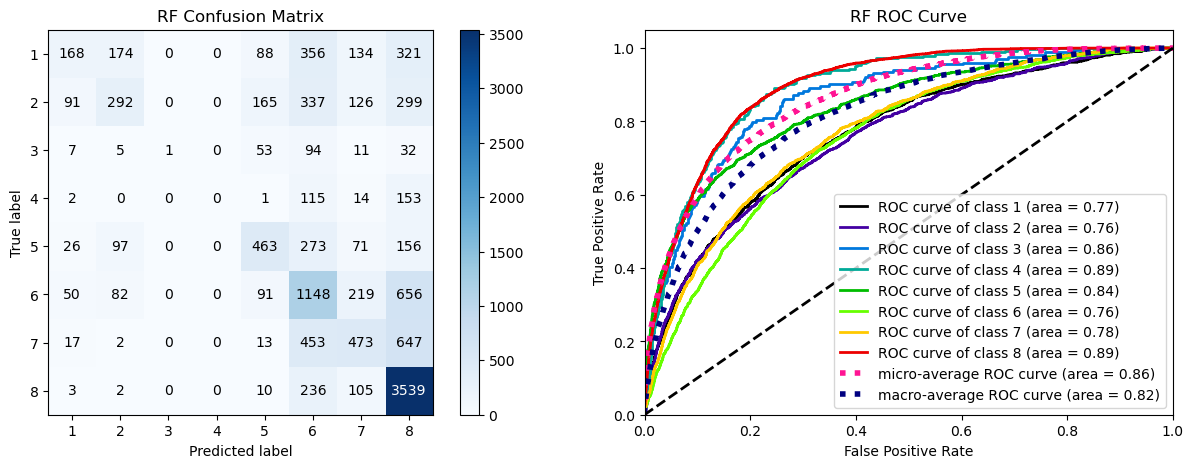

In [ ]:
# evaluate RF model
rf_cm = confusion_matrix(y_test, rf_model_PredClass)
rf_acc = balanced_accuracy_score(y_test, rf_model_PredClass)
rf_roc_auc = roc_auc_score(y_test, rf_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, rf_model_PredClass, ax=ax1)
ax1.set_title('RF Confusion Matrix')
plot_roc(y_test, rf_model_PredProb, ax=ax2)

ax2.set_title('RF ROC Curve')


Text(0.5, 1.0, 'MLP ROC Curve')

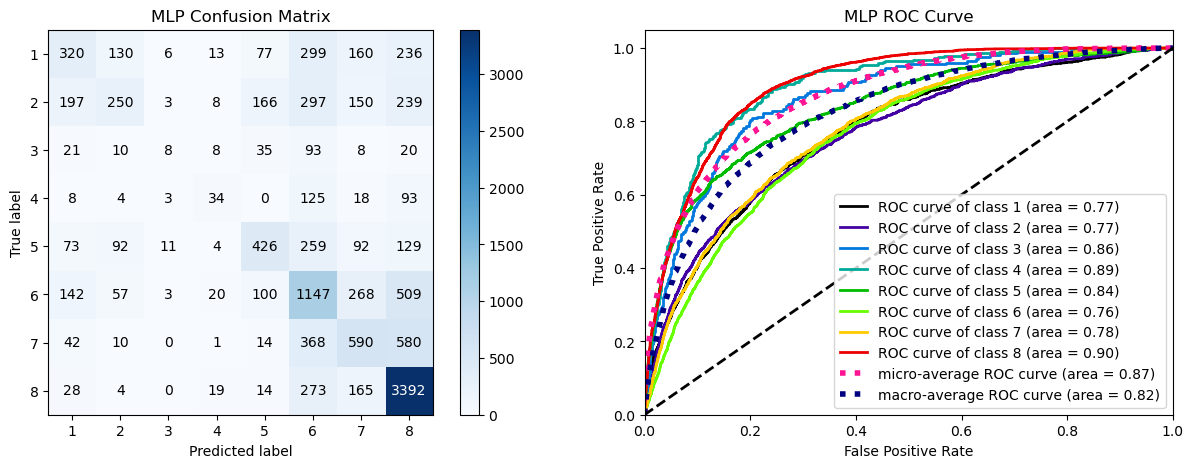

In [ ]:
# evaluate MLP model
mlp_cm = confusion_matrix(y_test, mlp_model_PredClass)
mlp_acc = balanced_accuracy_score(y_test, mlp_model_PredClass)
mlp_roc_auc = roc_auc_score(y_test, mlp_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, mlp_model_PredClass, ax=ax1)
ax1.set_title('MLP Confusion Matrix')
plot_roc(y_test, mlp_model_PredProb, ax=ax2)

ax2.set_title('MLP ROC Curve')

Text(0.5, 1.0, 'Stacked ROC Curve')

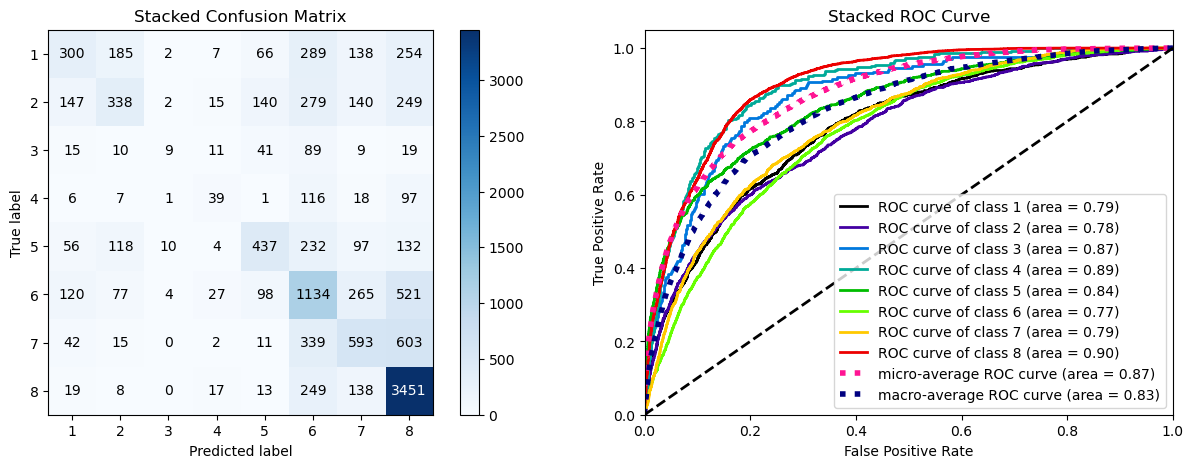

In [ ]:
# evaluate stacked model
stacked_cm = confusion_matrix(y_test, stacked_model_PredClass)
stacked_acc = balanced_accuracy_score(y_test, stacked_model_PredClass)

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, stacked_model_PredClass, ax=ax1)
ax1.set_title('Stacked Confusion Matrix')
plot_roc(y_test, stacked_model_PredProb, ax=ax2)
ax2.set_title('Stacked ROC Curve')



In [ ]:
# calculate classification report for each model
print("XGBoost Model:")
print(classification_report(y_test, xgb_model_PredClass))

print("OVO Model:")
print(classification_report(y_test, ovo_model_PredClass))

print("LightGBM Model:")
print(classification_report(y_test, lgb_model_PredClass))

print("RF Model:")
print(classification_report(y_test, rf_model_PredClass))

print("LightGBM Model:")
print(classification_report(y_test, mlp_model_PredClass))

print("Stacked Model:")
print(classification_report(y_test, stacked_model_PredClass))

XGBoost Model:
              precision    recall  f1-score   support

           1       0.43      0.22      0.29      1241
           2       0.45      0.28      0.34      1310
           3       0.33      0.01      0.03       203
           4       0.29      0.09      0.14       285
           5       0.55      0.40      0.47      1086
           6       0.41      0.52      0.46      2246
           7       0.42      0.34      0.38      1605
           8       0.65      0.89      0.75      3895

    accuracy                           0.53     11871
   macro avg       0.44      0.35      0.36     11871
weighted avg       0.50      0.53      0.50     11871

OVO Model:
              precision    recall  f1-score   support

           1       0.41      0.23      0.29      1241
           2       0.43      0.26      0.33      1310
           3       0.35      0.04      0.07       203
           4       0.30      0.10      0.15       285
           5       0.54      0.41      0.46      108

F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Learning Curve**

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer

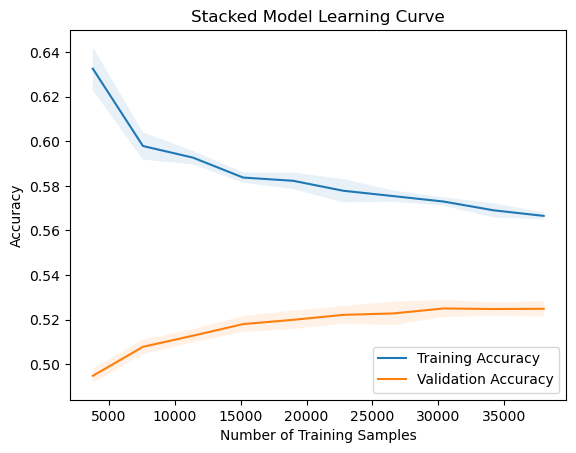

In [ ]:
# Learning Curve for lgbm
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=stacked_model,
                                                        X=X_train_norm,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.legend(loc='lower right')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Stacked Model Learning Curve')
plt.show()

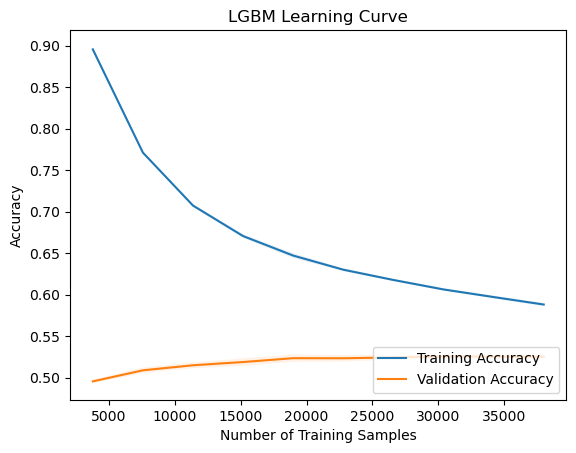

In [ ]:
# Learning Curve for lgbm
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=lgb_model,
                                                        X=X_train_norm,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.legend(loc='lower right')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('LGBM Learning Curve')
plt.show()

## **XAI**

### **Light GBM**

#### **Feature Importance (Global)**

Text(0.5, 0, 'Light GBM Feature Importance')

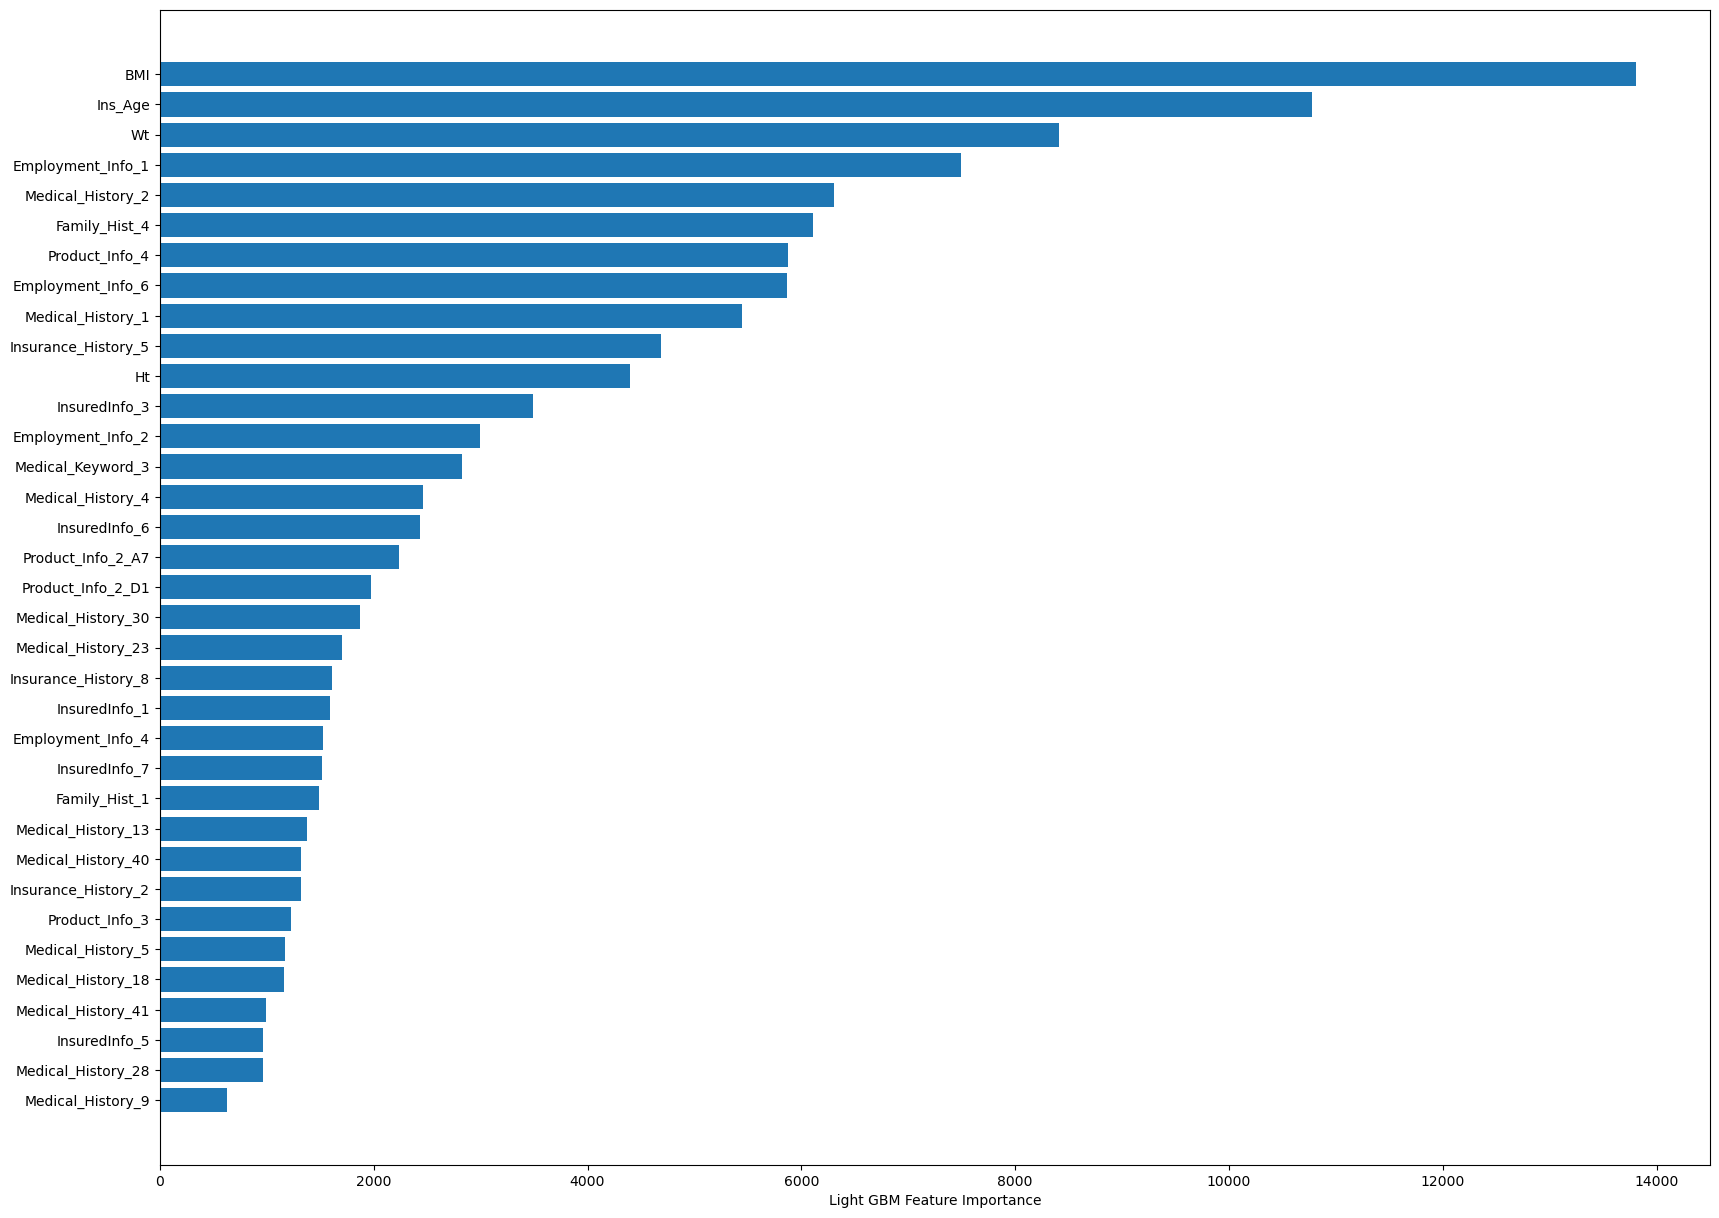

In [ ]:
cols = X_train.columns

sorted_idx = lgb_model.feature_importances_.argsort()
sorted_cols = [cols[i] for i in sorted_idx]
plt.figure(figsize=(20,15))
plt.barh(sorted_cols, lgb_model.feature_importances_[sorted_idx])
plt.xlabel("Light GBM Feature Importance")


#### **Shapley Values (Global)**

In [ ]:
# Convert X_train_norm to dataframe to add column names
X_train_norm = pd.DataFrame(X_train_norm, columns = cols )

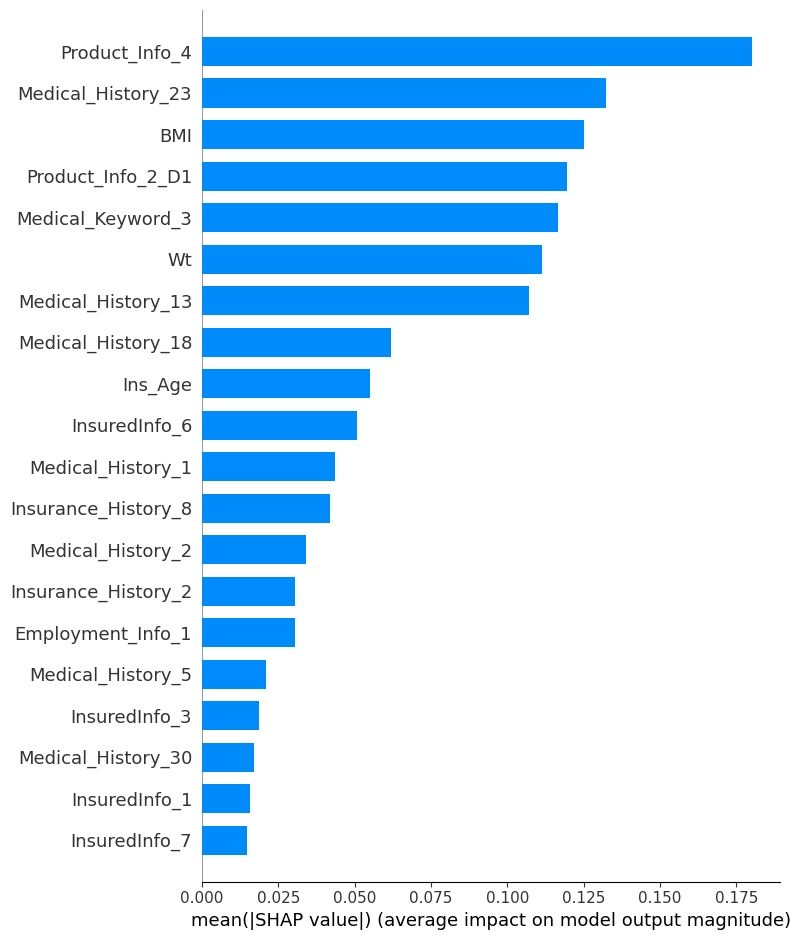

In [ ]:
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_train_norm)
shap.summary_plot(shap_values[1], X_train_norm, plot_type='bar',feature_names=cols)

#### Partial Dependence Plots

<Figure size 2000x1500 with 0 Axes>

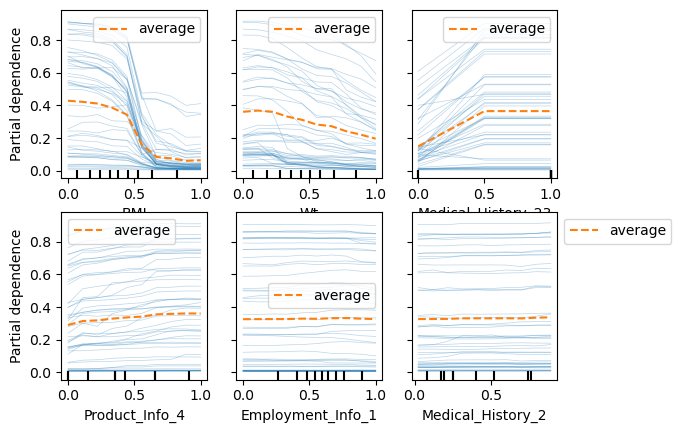

In [ ]:
n = 50
fig = plt.figure(figsize=(20, 15))
pdp_features = ['BMI', 'Wt', 'Medical_History_23', 'Product_Info_4', 'Employment_Info_1', 'Medical_History_2']
PartialDependenceDisplay.from_estimator(
  lgb_model, X_train_norm, pdp_features, kind="both", n_jobs=3, subsample=n, grid_resolution=10,target=7)
plt.legend(bbox_to_anchor=(1,1));

<Figure size 2000x1500 with 0 Axes>

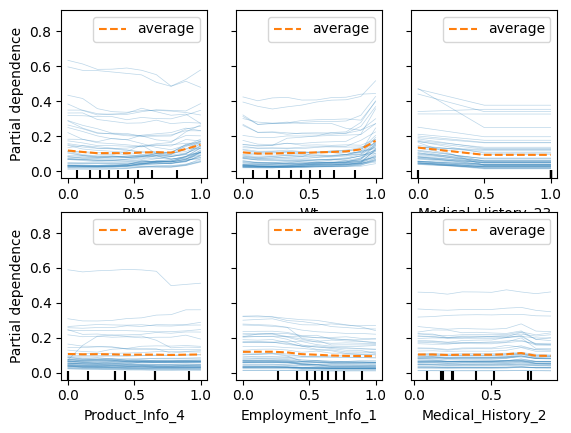

In [ ]:
n = 50
fig = plt.figure(figsize=(20, 15))
pdp_features = ['BMI', 'Wt', 'Medical_History_23', 'Product_Info_4', 'Employment_Info_1', 'Medical_History_2']
PartialDependenceDisplay.from_estimator(
  lgb_model, X_train_norm, pdp_features, kind="both", n_jobs=3, subsample=n, grid_resolution=10,target=0)
plt.legend(bbox_to_anchor=(1,1));

#### Surrogate Models (Global)

In [ ]:
lgb_train_pred = lgb_model.predict(X_train_norm)

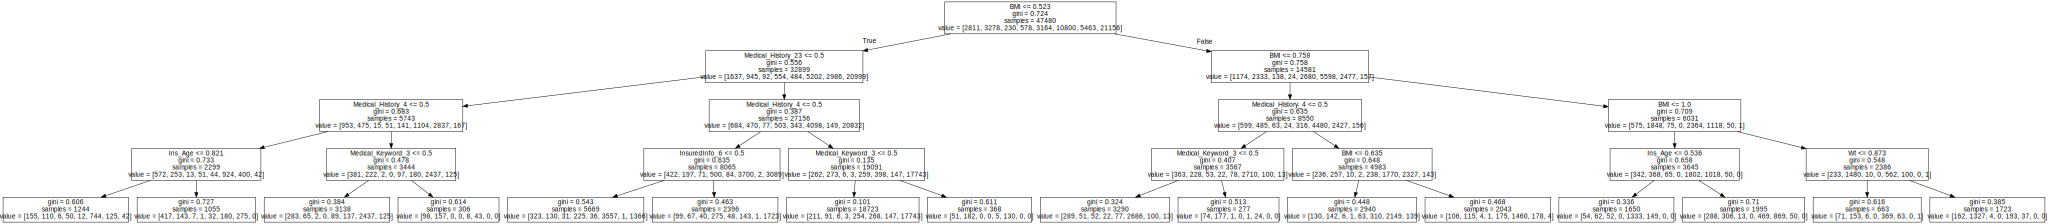

In [ ]:
# Decision Tree surrogate model of Random Forest model
from sklearn import tree
import graphviz

proxy = DecisionTreeClassifier(random_state = 12345,max_depth=4)    # Control the depth of the proxy tree here
proxy.fit(X_train_norm, lgb_train_pred)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = cols)

# render the graph as a PNG image
graph = graphviz.Source(tree_graph, format='png')

# save the image to a file
graph.render('decision_tree')

# display the graph in Jupyter Notebook
graph


In [ ]:
from sklearn.metrics import matthews_corrcoef
# How good is this surrogate decision tree model?
# Let's find out by computing the correlation between the predictions of the original model and the surrogate model
y_proxy = proxy.predict(X_train_norm) # Use the decision tree to make predictions
y_proxy = pd.DataFrame(y_proxy)
print("Matthews correlation coefficient (MCC) between Light GBM predictions and Surrogate Model predictions: ",matthews_corrcoef(lgb_train_pred,y_proxy))

Matthews correlation coefficient (MCC) between Light GBM predictions and Surrogate Model predictions:  0.7029639678245614


####*Shapley Values (Local)*

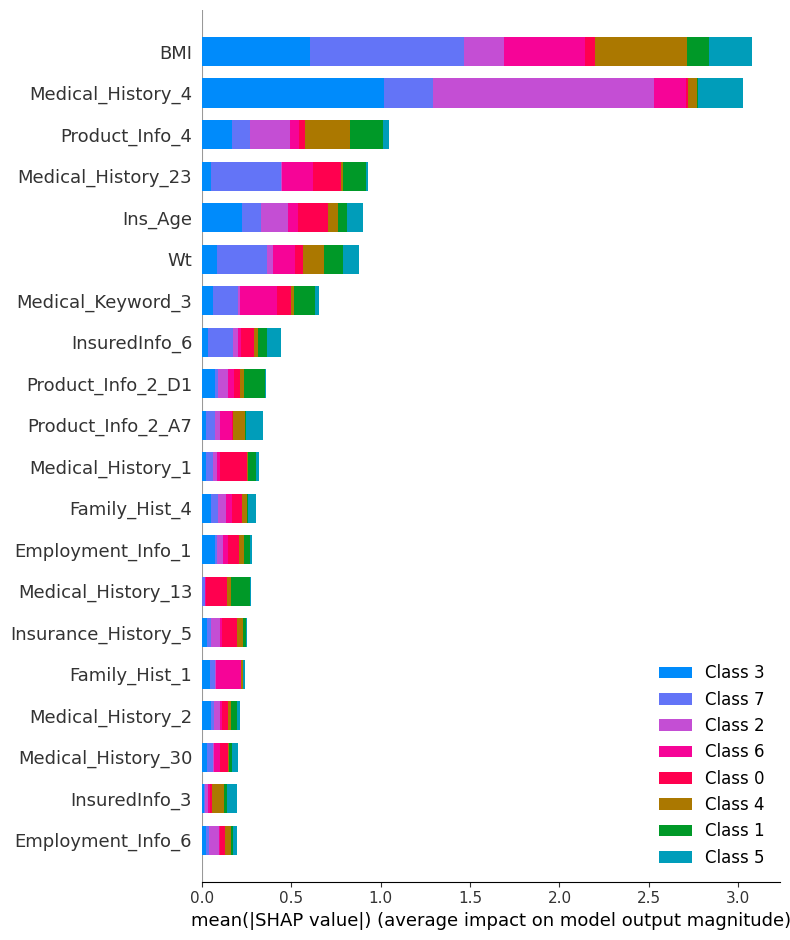

In [ ]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values, X_train_norm,feature_names=cols, plot_type="bar")




*   The model is generalized to predict across the entire distribution to a reasonable degree of accuracy, with highest value belonging to class 8.
*   Some features play a significant role in decision making process, for example, BMI, Medical_History_23, and Product_Info_4
*   The model could be more useful if assigned to predict fewer risk classes. In delopment, this model could be used to aid underwriters in evaluating the risk classes, for example, prviding a probability of each class and red flag the important considerations in each instances.
